Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'ETH'
against_currency = 'USD'

start = dt.datetime(2014,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2015-08-06,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05,ETH-USD
2015-08-07,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05,ETH-USD
2015-08-08,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05,ETH-USD
2015-08-09,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05,ETH-USD
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06,ETH-USD
...,...,...,...,...,...,...,...
2021-06-28,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,2.481512e+10,ETH-USD
2021-06-29,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,2.582806e+10,ETH-USD
2021-06-30,2274.397461,2274.397461,2081.081055,2113.605469,2113.605469,2.906170e+10,ETH-USD
2021-07-01,2109.892578,2155.596436,2021.824829,2150.040283,2150.040283,3.179621e+10,ETH-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2158 entries, 2015-08-06 to 2021-07-02
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      2153 non-null   float64
 1   high      2153 non-null   float64
 2   low       2153 non-null   float64
 3   close     2153 non-null   float64
 4   adjclose  2153 non-null   float64
 5   volume    2153 non-null   float64
 6   ticker    2158 non-null   object 
 7   spread    2153 non-null   float64
dtypes: float64(7), object(1)
memory usage: 151.7+ KB


## Plot the closing value of Ethereum over time

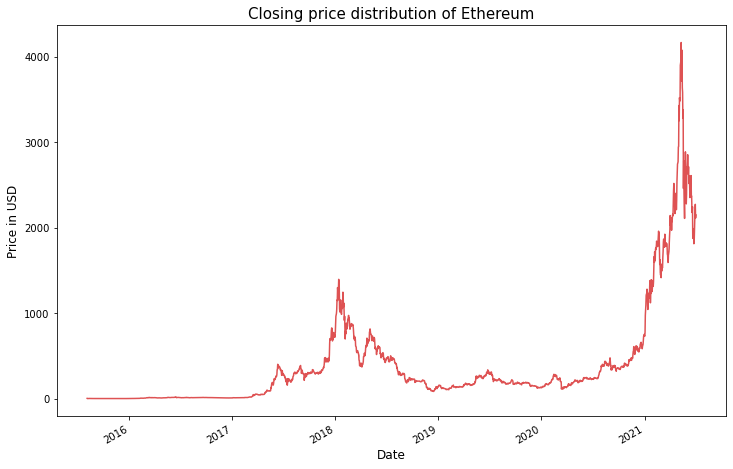

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of Ethereum", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of ETH')

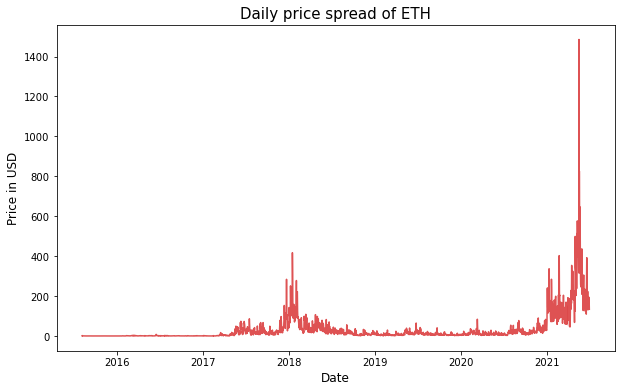

In [5]:
fig, ax = plt.subplots(figsize=(10,6))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of ETH", fontsize=15)

## Candlestick chart

In [6]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
temp_base_df

,open,high,low,close,adjclose,volume,ticker
2015-08-06,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05,ETH-USD
2015-08-07,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05,ETH-USD
2015-08-08,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05,ETH-USD
2015-08-09,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05,ETH-USD
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06,ETH-USD
...,...,...,...,...,...,...,...
2021-06-28,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,2.481512e+10,ETH-USD
2021-06-29,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,2.582806e+10,ETH-USD
2021-06-30,2274.397461,2274.397461,2081.081055,2113.605469,2113.605469,2.906170e+10,ETH-USD
2021-07-01,2109.892578,2155.596436,2021.824829,2150.040283,2150.040283,3.179621e+10,ETH-USD


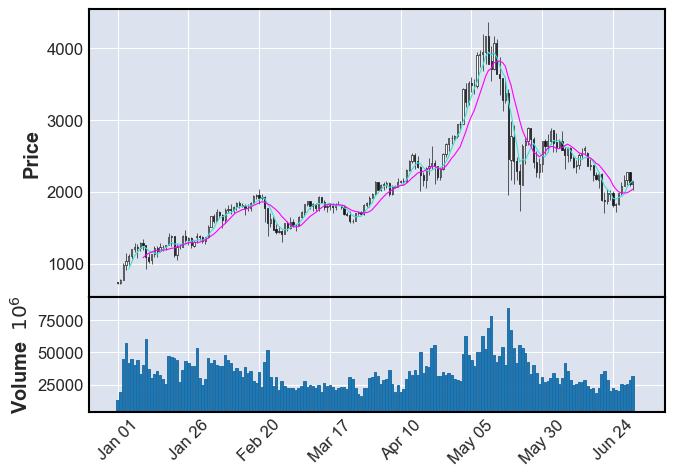

In [7]:
mpf.plot(temp_base_df.loc['2021-1-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [8]:
from fbprophet import Prophet

In [9]:
base_df

,open,high,low,close,adjclose,volume,ticker,spread
2015-08-06,2.831620,3.536610,2.521120,2.772120,2.772120,1.643290e+05,ETH-USD,1.015490
2015-08-07,2.793760,2.798810,0.714725,0.753325,0.753325,6.741880e+05,ETH-USD,2.084085
2015-08-08,0.706136,0.879810,0.629191,0.701897,0.701897,5.321700e+05,ETH-USD,0.250619
2015-08-09,0.713989,0.729854,0.636546,0.708448,0.708448,4.052830e+05,ETH-USD,0.093308
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.067860,1.463100e+06,ETH-USD,0.468175
...,...,...,...,...,...,...,...,...
2021-06-28,2083.448730,2242.238770,2076.240234,2160.768311,2160.768311,2.481512e+10,ETH-USD,165.998535
2021-06-29,2164.216309,2282.989014,2090.760742,2274.547607,2274.547607,2.582806e+10,ETH-USD,192.228271
2021-06-30,2274.397461,2274.397461,2081.081055,2113.605469,2113.605469,2.906170e+10,ETH-USD,193.316406
2021-07-01,2109.892578,2155.596436,2021.824829,2150.040283,2150.040283,3.179621e+10,ETH-USD,133.771606


In [10]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
1762,2020-06-02,244.179321
1763,2020-06-03,244.426392
1764,2020-06-04,241.221985
1765,2020-06-05,241.931320
1766,2020-06-06,245.167252
...,...,...
2153,2021-06-28,2160.768311
2154,2021-06-29,2274.547607
2155,2021-06-30,2113.605469
2156,2021-07-01,2150.040283


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
420,2021-07-28,2203.170240,1769.939024,2636.208657
421,2021-07-29,2172.212320,1747.278505,2616.995424
422,2021-07-30,2169.401184,1710.798794,2633.939276
423,2021-07-31,2168.421440,1704.548565,2622.522953
424,2021-08-01,2174.670396,1707.456508,2647.323079


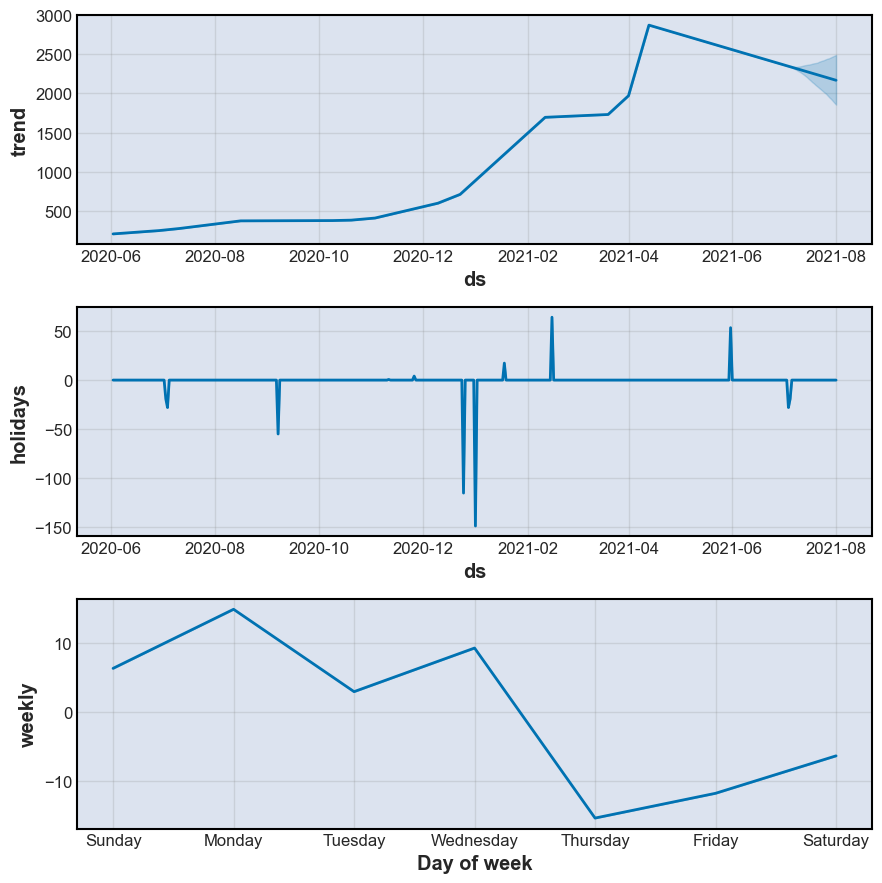

In [11]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

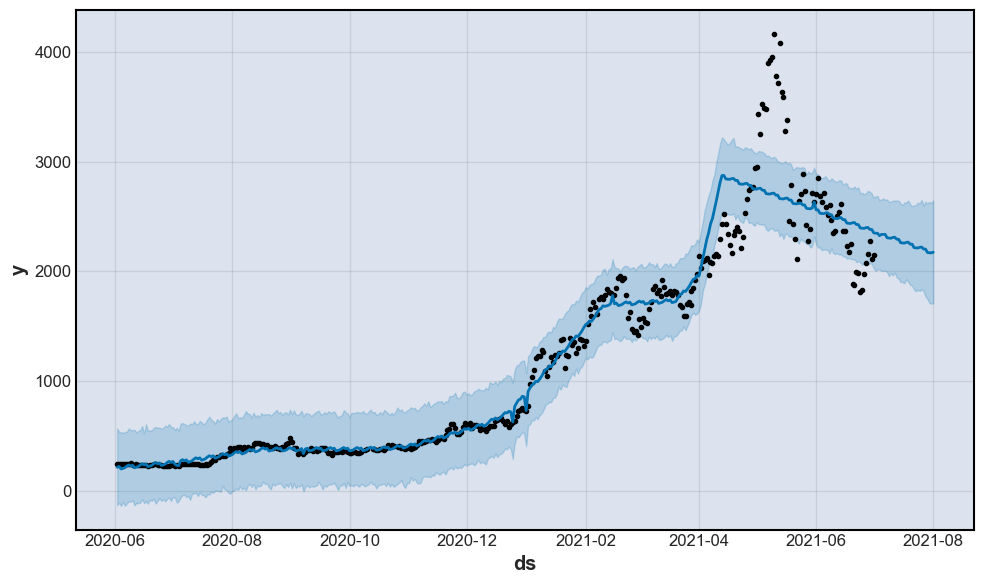

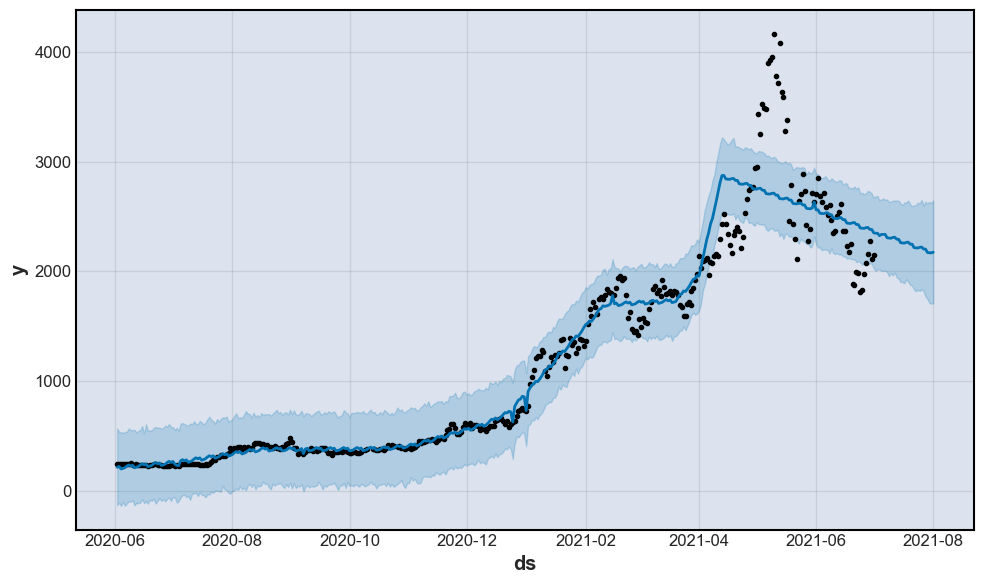

In [12]:
m.plot(forecast)